In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tifffile
from colicoords import Data, Cell, CellListPlot, data_to_cells, CellPlot

You are using ColiCoords version 0.1.1-dev_symfit


C:\Miniconda3\envs\py_main\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In this example we will look at how to handle and process many cells using `ColiCoords`. For this example we will load a stack of 20 images and make cell objects out of all cell as identified in the binay images. The input data stacks need to be the same shape and as before need to be loaded into a `Data` object.

In [3]:
binary_stack = tifffile.imread('data/02_binary_stack.tif')
brightfield_stack = tifffile.imread('data/02_brightfield_stack.tif')
fluorescence_stack = tifffile.imread('data/02_fluorescence_stack.tif')
binary_stack.shape, brightfield_stack.shape, fluorescence_stack.shape

((20, 512, 512), (20, 512, 512), (20, 512, 512))

<IPython.core.display.Javascript object>


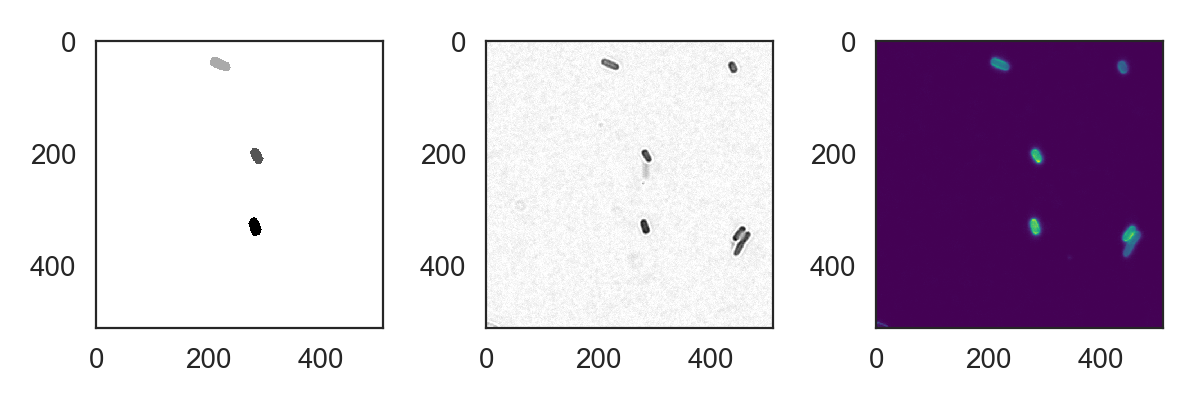

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(6, 2))
axes[0].imshow(binary_stack[0], cmap='gray_r')
axes[1].imshow(brightfield_stack[0], cmap='gray')
axes[2].imshow(fluorescence_stack[0], cmap='viridis')
plt.tight_layout()

In [6]:
data = Data()
data.add_data(binary_stack, 'binary')
data.add_data(brightfield_stack, 'brightfield')
data.add_data(fluorescence_stack, 'fluorescence', name='flu_514')

As can be seen in the code block above, a `Data` object can also have 3D (stacks) images, as long as all shapes are equal. The `Data` object supports iteration and slicing similar to `numpy.nadarray`s and this is used in the function `data_to_cells` to cut single cells out of the data and create `Cell` objects. 

In [7]:
cells = data_to_cells(data)
len(cells)

C:\Miniconda3\envs\py_main\lib\site-packages\mahotas\features\moments.py:55: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(img.dtype, float) and convert_to_float:


Cell 3 on image binary 1: multiple cells per selection
Cell 4 on image binary 1: multiple cells per selection
Cell 5 on image binary 1: multiple cells per selection
Image binary 7: No cells
Cell 2 on image binary 19: multiple cells per selection
Cell 3 on image binary 19: multiple cells per selection


76

A `CellList` object is returned which is basically is a list of many cells. As in example one, the coordinate system is optimized, in this case we choose to use the brightfield image. Calling `CellList.optimize` will optimize all cells in the `CellList` object one by one. Functions calls for parallelization are availalbe (examples and documentation on construction).

In [11]:
cells.measure_r('brightfield', mode='max')

In [9]:
cells.optimize_mp('brightfield')
cells.measure_r('brightfield', mode='mid')

We can then make a `CellListPlot` object which provides functions for plotting properties of all cells in the set. In this example, the `r` value is measured by the maximum value, and due to the quantized nature of the pixels the radius histogram is a square distribution instead of normal. 

In [10]:
clp = CellListPlot(cells)

<IPython.core.display.Javascript object>


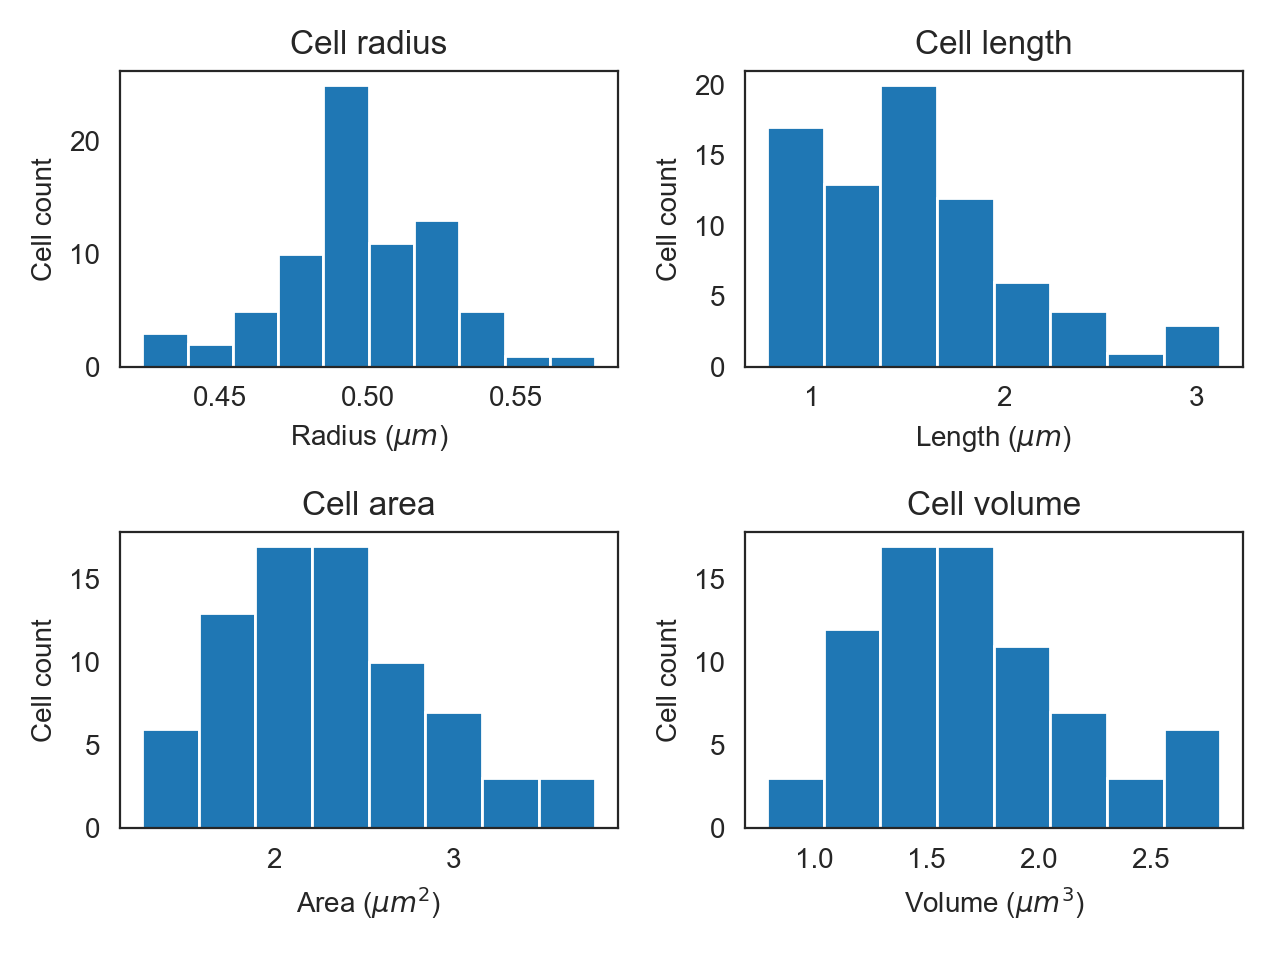

In [11]:
fig, axes = plt.subplots(2, 2)
clp.hist_property(ax=axes[0,0], prop='radius', bins='fd')
clp.hist_property(ax=axes[0,1], prop='length')
clp.hist_property(ax=axes[1,0], prop='area')
clp.hist_property(ax=axes[1,1], prop='volume')
plt.tight_layout()
plt.autoscale()

The radial distribution can be plotted though `CellList.plot_r_dist()`. With the keyword arguments `norm_x` and `norm_y` the radial distribution is normalized with on te the x and y axis, respectively.

In [17]:
c  = cells[0]
c.measure_r('brightfield', mode='mid')

r value not found


In [18]:
x, y = c.r_dist(20, 1, data_name='brightfield')  # todo again need sensible default for stop


<IPython.core.display.Javascript object>


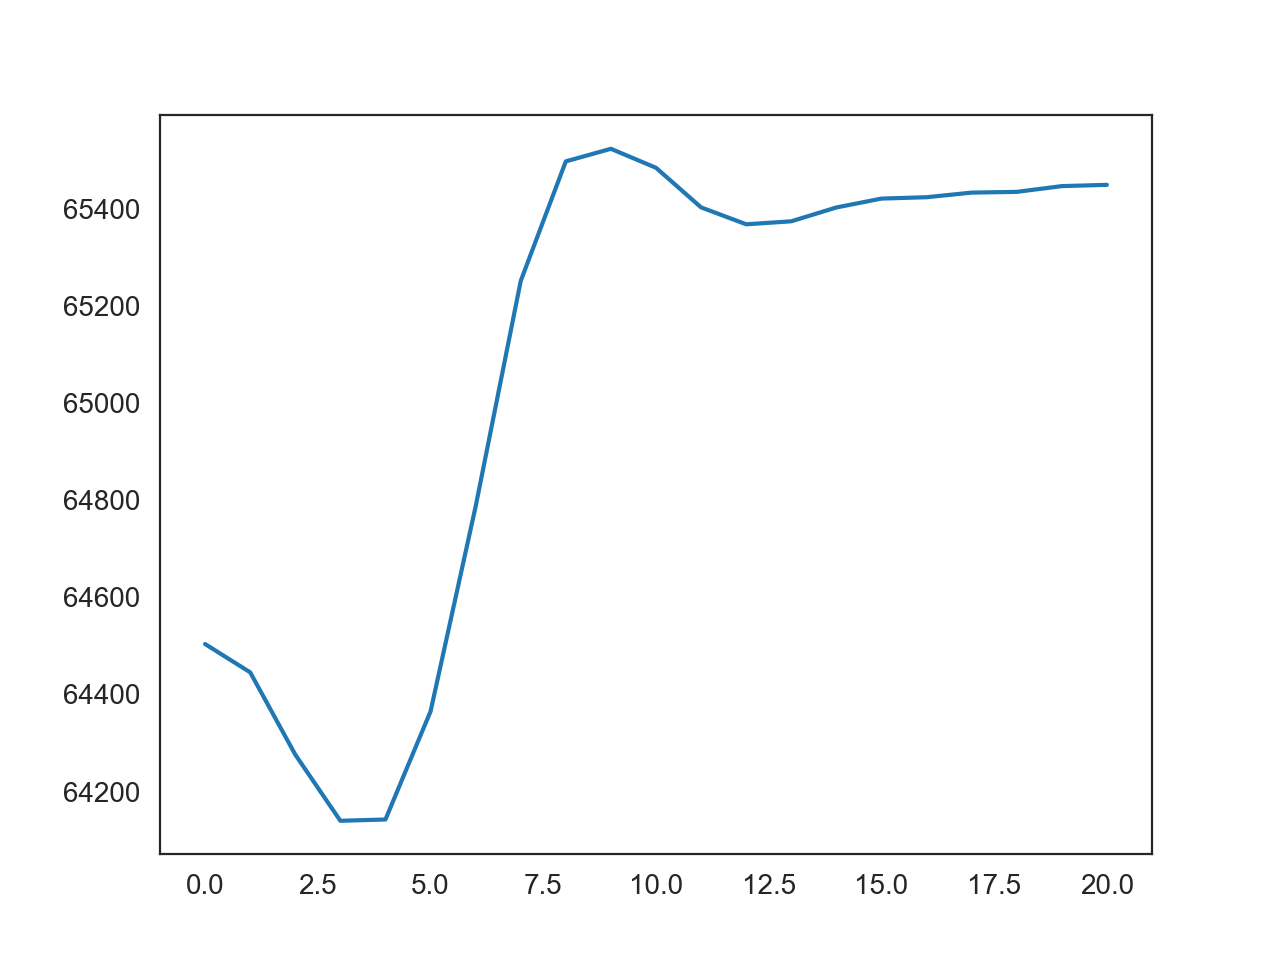

In [19]:
plt.figure()
plt.plot(x, y)

In [21]:
import numpy as np

In [22]:
mid_val = (np.min(y) + np.max(y)) / 2
imin = np.argmin(y)
imax = np.argmax(y)
imin, imax

(3, 9)

In [30]:
y_select = y[imin:imax] if imax > imin else y[imax:imin][::-1]

In [27]:
y[imin:imax][::-1]

array([65498.74470248, 65252.27354529, 64787.52282604, 64365.14115695,
       64142.36412366, 64139.67081893])

In [31]:
np.all(np.diff(y_select) > 0)

True

In [32]:
x_select = x[imin:imax] if imax > imin else x[imax:imin][::-1]


In [33]:
np.interp(mid_val, y_select, x_select)

6.096019789224049

<IPython.core.display.Javascript object>


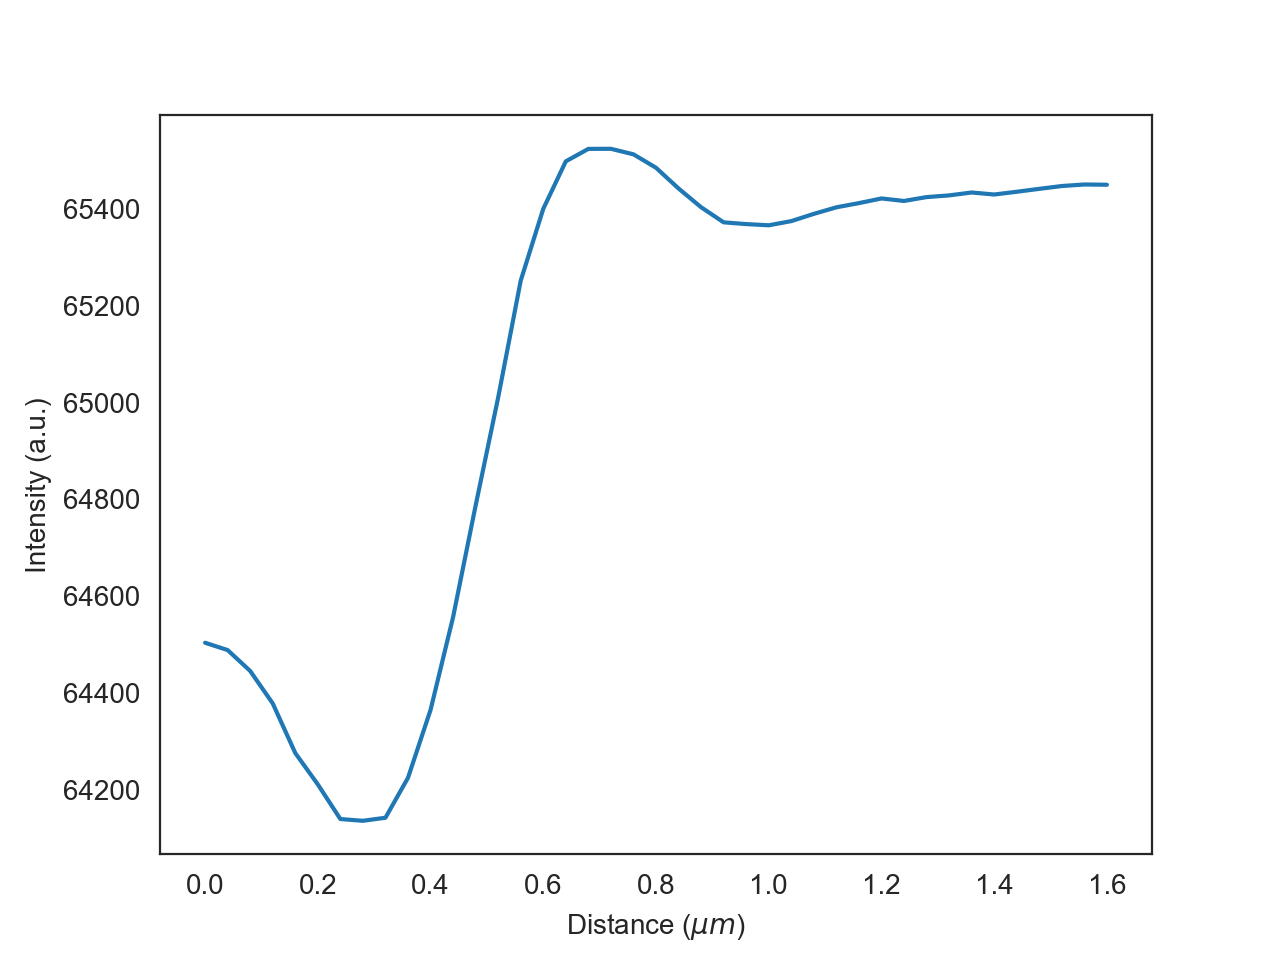

In [16]:
cp = CellPlot(cells[0])
plt.figure()
cp.plot_r_dist(data_name='brightfield')

<IPython.core.display.Javascript object>


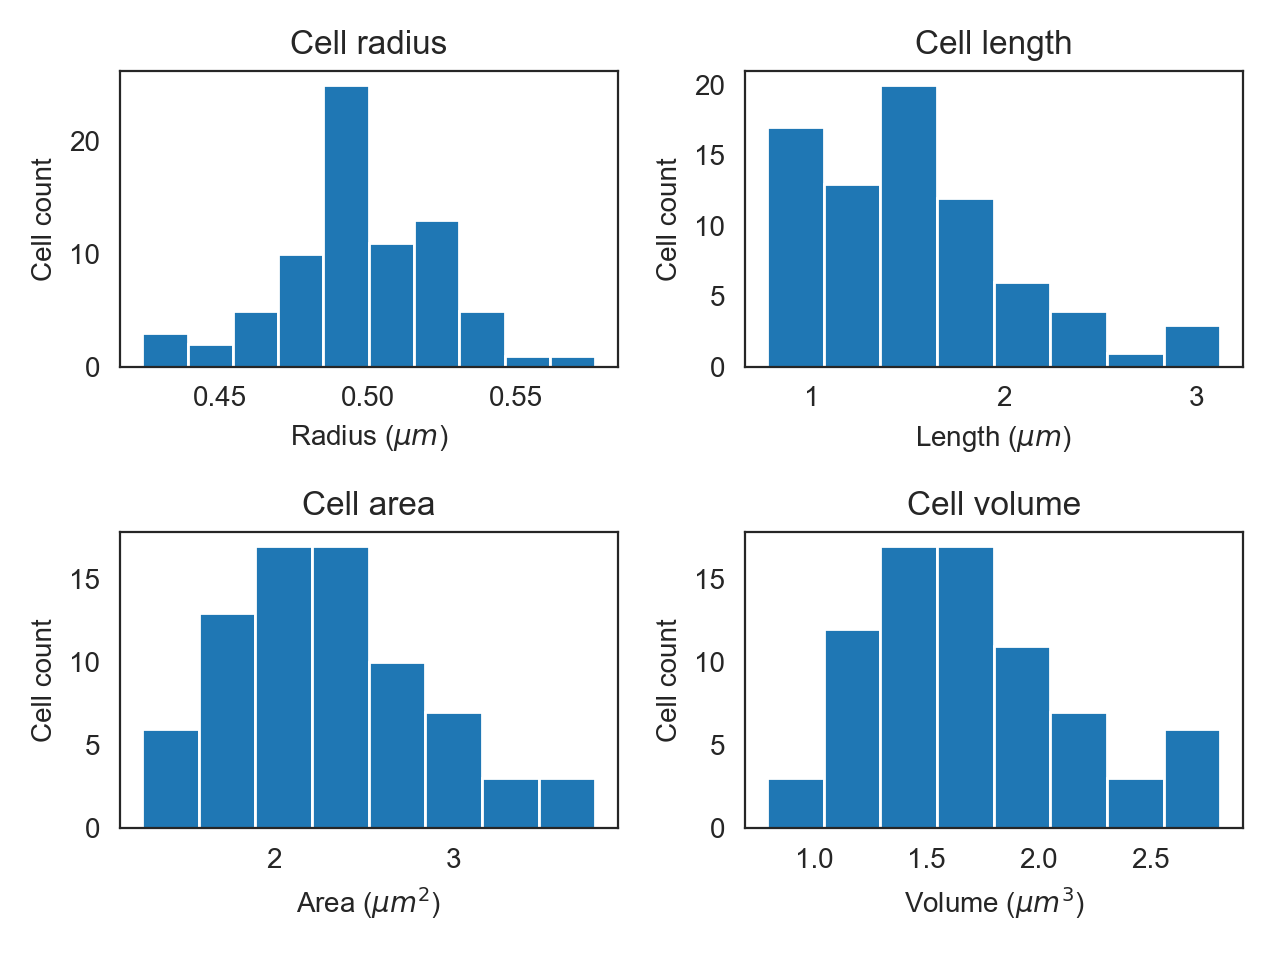

In [12]:
fig, axes = plt.subplots(2, 2)
clp.hist_property(ax=axes[0,0], prop='radius', bins='fd')
clp.hist_property(ax=axes[0,1], prop='length')
clp.hist_property(ax=axes[1,0], prop='area')
clp.hist_property(ax=axes[1,1], prop='volume')
plt.tight_layout()
plt.autoscale()

<IPython.core.display.Javascript object>


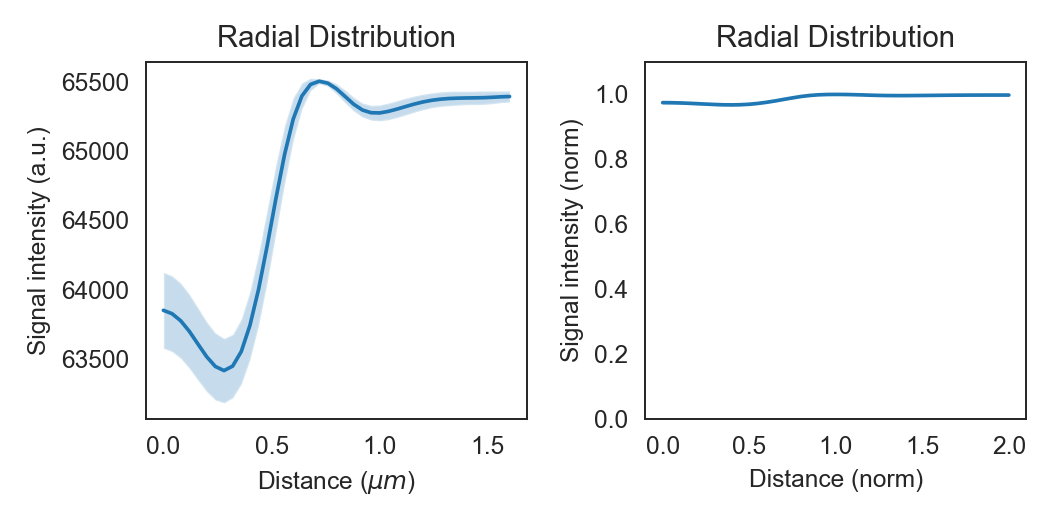

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
clp.plot_r_dist(data_name='brightfield', ax=axes[0])
clp.plot_r_dist(data_name='brightfield', ax=axes[1], norm_x=True, norm_y=True)
plt.tight_layout()

<IPython.core.display.Javascript object>


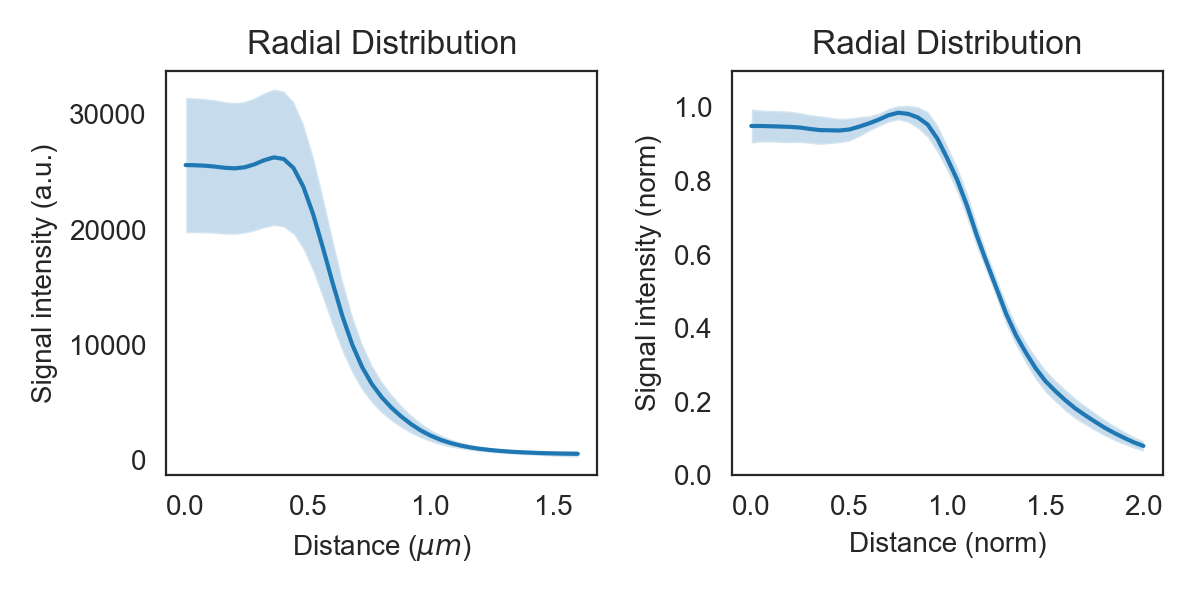

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
clp.plot_r_dist(ax=axes[0])
clp.plot_r_dist(ax=axes[1], norm_x=True, norm_y=True)
plt.tight_layout()